In [1]:
import os
import hopsworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv()
    
project = hopsworks.login()
fs = project.get_feature_store()

2025-01-05 19:03:07,904 INFO: Initializing external client
2025-01-05 19:03:07,905 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-01-05 19:03:09,398 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1159324


In [3]:
grailed_items_fg = fs.get_feature_group(
    name='draft_grailed_items',
    version=4,
)

In [4]:
grailed_items_fg.features

[Feature('id', 'bigint', None, True, False, None, None, 1394604),
 Feature('sold_at', 'timestamp', None, False, False, None, None, 1394604),
 Feature('designer_names', 'array<float>', None, False, False, None, None, 1394604),
 Feature('description', 'array<float>', None, False, False, None, None, 1394604),
 Feature('title', 'array<float>', None, False, False, None, None, 1394604),
 Feature('hashtags', 'array<float>', None, False, False, None, None, 1394604),
 Feature('category_path', 'bigint', None, False, False, None, None, 1394604),
 Feature('condition', 'bigint', None, False, False, None, None, 1394604),
 Feature('size', 'array<float>', None, False, False, None, None, 1394604),
 Feature('color', 'bigint', None, False, False, None, None, 1394604),
 Feature('followerno', 'bigint', None, False, False, None, None, 1394604),
 Feature('sold_price', 'bigint', None, False, False, None, None, 1394604)]

## Create feature view

In [5]:
features = ['designer_names', 'category_path', 'size', 'color', 'condition', 'followerno', 'hashtags', 'description', 'title']
labels = ['sold_price']

In [6]:
selected_features = grailed_items_fg.select(features + labels)
selected_features.show(10)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.71s) 


,designer_names,category_path,size,color,condition,followerno,hashtags,description,title,sold_price
0,"[0.008455929, 0.0028697923, 0.06372963, -0.034...",2411092262,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3896101161,1,1,"[-0.03810654, -0.006580899, 0.01852548, 0.0113...","[-0.03614048, 0.015635908, 0.036675498, -0.022...","[-0.033801984, -0.0314781, 0.024480032, -0.012...",55
1,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2973695580,2,8,"[0.048452068, -0.001368538, 0.016888341, -0.04...","[-0.033516455, 0.04683744, 0.007957818, 0.0407...","[-0.022699146, 0.008013024, 0.041338712, 0.035...",569
2,"[-0.04072198, -0.0048362296, 0.048269928, 0.00...",309901687,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2807742906,2,9,"[-0.08957221, 0.0024209158, -0.0056982324, 0.0...","[-0.03905363, 0.008795027, -0.016913513, 0.014...","[-0.020307204, 0.027977625, 0.010602047, -0.01...",278
3,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2973695580,3,73,"[-0.052392323, -0.034530703, -0.029495526, -0....","[-0.08783149, 0.023678502, 0.022103464, -0.009...","[-0.030230703, -0.031346425, 0.010791936, 0.01...",800
4,"[-0.0413155, -0.025468638, 0.02902394, -0.0297...",1698257419,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3012185078,2,42,"[-0.028539332, 0.011829672, 0.05398404, 0.0019...","[-0.010625219, 0.011431177, 0.00027578892, -0....","[-0.024104822, 0.012512886, 0.033501167, 0.012...",180
5,"[-0.023065727, 0.00799096, 0.047225375, 0.0027...",109869071,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3892230005,2,7,"[-0.07543781, -0.017064571, 0.007872403, 0.036...","[-0.06583838, 0.037773512, 0.04039962, -0.0096...","[-0.05441786, -0.013890245, 0.031741533, 0.016...",36
6,"[-0.017075147, 0.007701589, 0.085046604, -0.01...",1698257419,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",271855843,3,65,"[0.018743245, -0.024017261, -0.006219109, -0.0...","[-0.04980058, 0.027313415, 0.07170434, -0.0307...","[-0.09509616, 0.006928549, 0.010449396, -0.028...",72
7,"[-0.021199932, -0.02255822, 0.06599677, -0.003...",991000826,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2973695580,1,2,"[-0.045984022, 0.04901945, 0.04931234, 0.02790...","[-0.051647905, -0.0071153087, 0.010234532, -0....","[-0.0287803, -0.0032674577, 0.0071817385, -0.0...",35
8,"[-0.038397297, 0.02080292, 0.04160584, -0.0728...",109869071,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2807742906,2,17,"[-0.04747075, 0.042539764, 0.067541204, -0.058...","[-0.02839256, 0.039140027, 0.05657124, -0.0132...","[-0.04790936, 0.04338459, 0.028106825, -0.0019...",39
9,"[-0.017563483, 0.020716926, 0.11166117, 0.0184...",1797518063,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1875972108,2,22,"[-0.021639548, 0.0579892, 0.10188011, 0.004635...","[-0.060781166, 0.001159273, 0.04119494, 0.0105...","[-0.08946444, 0.030398728, 0.08259076, -0.0032...",54


In [7]:
feature_view = fs.get_or_create_feature_view(
    name='draft_grailed_items_fv',
    version=2,
    labels=['sold_price'],
    query=selected_features,
)

In [8]:
X_train, X_test, y_train, y_test = feature_view.train_test_split(test_size=0.2)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.85s) 


In [9]:
X_train

,designer_names,category_path,size,color,condition,followerno,hashtags,description,title
0,"[0.008455929, 0.0028697923, 0.06372963, -0.034...",2411092262,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3896101161,1,1,"[-0.03810654, -0.006580899, 0.01852548, 0.0113...","[-0.03614048, 0.015635908, 0.036675498, -0.022...","[-0.033801984, -0.0314781, 0.024480032, -0.012..."
1,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2973695580,2,8,"[0.048452068, -0.001368538, 0.016888341, -0.04...","[-0.033516455, 0.04683744, 0.007957818, 0.0407...","[-0.022699146, 0.008013024, 0.041338712, 0.035..."
2,"[-0.04072198, -0.0048362296, 0.048269928, 0.00...",309901687,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2807742906,2,9,"[-0.08957221, 0.0024209158, -0.0056982324, 0.0...","[-0.03905363, 0.008795027, -0.016913513, 0.014...","[-0.020307204, 0.027977625, 0.010602047, -0.01..."
4,"[-0.0413155, -0.025468638, 0.02902394, -0.0297...",1698257419,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3012185078,2,42,"[-0.028539332, 0.011829672, 0.05398404, 0.0019...","[-0.010625219, 0.011431177, 0.00027578892, -0....","[-0.024104822, 0.012512886, 0.033501167, 0.012..."
5,"[-0.023065727, 0.00799096, 0.047225375, 0.0027...",109869071,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3892230005,2,7,"[-0.07543781, -0.017064571, 0.007872403, 0.036...","[-0.06583838, 0.037773512, 0.04039962, -0.0096...","[-0.05441786, -0.013890245, 0.031741533, 0.016..."
...,...,...,...,...,...,...,...,...,...
544,"[-0.012305662, 0.005881334, 0.03310295, -0.009...",1210587484,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3456290482,3,27,"[-0.0068234107, 0.036702488, 0.07079288, 0.019...","[-0.060795624, 0.041197035, -0.0052262903, -0....","[-0.056556396, 0.009773785, 0.0038271246, -0.0..."
545,"[0.0041395547, 0.006806383, -0.03478818, -0.03...",3946050273,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2132966520,2,13,"[-0.024253964, 0.037619475, 0.071053125, -0.00...","[0.029425327, 0.0040409896, 0.079568215, 0.027...","[-0.024529744, 0.042551596, 0.00820732, -0.010..."
546,"[-0.015929388, -0.07060307, 0.08135508, -0.022...",1100631664,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",169343378,3,69,"[-0.02988822, -0.026551057, 0.09859922, 0.0081...","[-0.009223303, -0.0066138157, 0.019461036, 0.0...","[-0.039792493, 0.037327003, 0.027305974, -0.03..."
547,"[-0.038397297, 0.02080292, 0.04160584, -0.0728...",1100631664,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",126602767,1,13,"[-0.01640417, 0.017567301, 0.062515, -0.058932...","[-0.07844071, 0.024912385, 0.047133703, -0.036...","[-0.11827109, 0.03206272, 0.031107208, -0.0449..."


## Create a predictive model

Candidates include: XGBoost, CatBoost (handles categorical features natively), KNN or a neural net.

In [10]:
from catboost import CatBoostRegressor, Pool

# raw_categorical_features = ['category_path', 'size', 'color']
embedding_features= ['designer_names', 'description', 'title', 'hashtags', 'size']

# Initialize the model
model = CatBoostRegressor(
    embedding_features=embedding_features,
    iterations=1000,
    # learning_rate=0.1,
    # depth=6,
    loss_function='RMSE',
    verbose=100  # Print training progress every 100 iterations
)

# Create CatBoost Pool objects
train_pool = Pool(
    data=X_train,
    label=y_train,
    embedding_features=embedding_features,
)

test_pool = Pool(
    data=X_test,
    label=y_test,
    embedding_features=embedding_features,
)

# Train the model
model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50
)

Learning rate set to 0.044747
0:	learn: 161.7389100	test: 165.3979890	best: 165.3979890 (0)	total: 62.9ms	remaining: 1m 2s
100:	learn: 94.7517877	test: 144.7834579	best: 144.7834579 (100)	total: 139ms	remaining: 1.24s
200:	learn: 72.5742344	test: 142.0656638	best: 141.7457848 (187)	total: 201ms	remaining: 799ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 141.6880036
bestIteration = 228

Shrink model to first 229 iterations.


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting target values on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE) using sklearn
mse = mean_squared_error(y_test.iloc[:,0], y_pred)
print("MSE:", mse)

# Calculating R squared using sklearn
r2 = r2_score(y_test.iloc[:,0], y_pred)
print("R squared:", r2)

MSE: 20075.49037396957
R squared: 0.27200934925349196


In [12]:
# TODO: Is the order correct?
predicted_df = y_test
predicted_df['predicted_price'] = y_pred

In [13]:
predicted_df

,sold_price,predicted_price
3,800,226.906245
23,54,38.551272
43,250,180.847812
50,100,90.291999
57,69,65.999694
...,...,...
520,90,89.516135
524,40,49.346191
526,45,56.415971
530,220,235.881407


### "Outdated" models

In [ ]:
# import numpy as np
# from xgboost import XGBRegressor

# # Convert the embeddings column into a numpy array of separate columns
# X_train_array = np.vstack(X_train['designers_title_embedding'].to_numpy())
# X_test_array = np.vstack(X_test['designers_title_embedding'].to_numpy())

# # Now train the model with the reshaped data
# xgb_regressor = XGBRegressor()
# xgb_regressor.fit(X_train_array, y_train)

In [15]:
# from sklearn.neighbors import KNeighborsRegressor
# knn_reg = KNeighborsRegressor(n_neighbors=5)
# knn_reg.fit(X_train_array, y_train)

## Evaluate model

In [16]:
# TODO: Plot performance, consider saving the plots as images

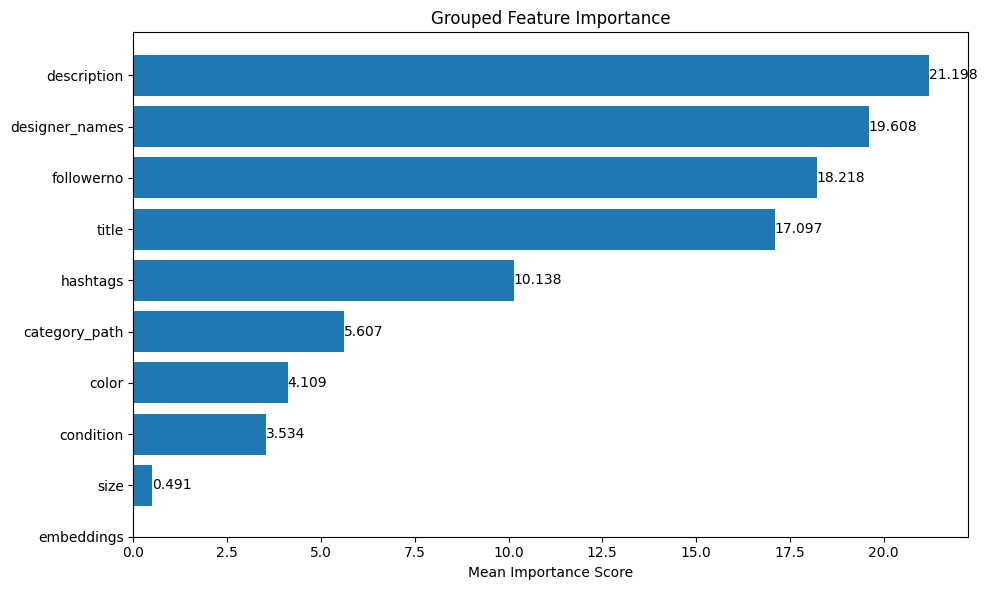

In [17]:
# TODO: Why is feature importance exactly 0 for unprocessed categorical features?
def plot_grouped_feature_importance(model, X_test, original_feature_names=features, embedding_prefix='embedding_'):
    # Get feature importance scores
    feature_importance = model.get_feature_importance()
    feature_names = X_test.columns
    
    # Create a dictionary to store grouped importance scores
    grouped_importance = {}
    
    # Group embedding features
    embedding_importance = np.mean([
        imp for name, imp in zip(feature_names, feature_importance)
        if name.startswith(embedding_prefix)
    ])
    grouped_importance['embeddings'] = embedding_importance
    
    # Group categorical features
    for feature in original_feature_names:
        feature_cols = [
            (name, imp) for name, imp in zip(feature_names, feature_importance)
            if name.startswith(feature)
        ]
        if feature_cols:  # If we found any columns for this feature
            grouped_importance[feature] = np.mean([imp for _, imp in feature_cols])
    
    # Create the plot
    fig, ax = plt.figure(figsize=(10, 6)), plt.axes()
    
    # Sort by importance
    sorted_importance = dict(sorted(grouped_importance.items(), key=lambda x: x[1]))
    
    # Plot horizontal bar chart
    y_pos = np.arange(len(sorted_importance))
    ax.barh(y_pos, list(sorted_importance.values()))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(sorted_importance.keys()))
    
    plt.title('Grouped Feature Importance')
    plt.xlabel('Mean Importance Score')
    
    # Add value labels on the bars
    for i, v in enumerate(sorted_importance.values()):
        ax.text(v, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    return plt

# Usage:
plot_grouped_feature_importance(model, X_test)
plt.show()

## Model registry

In [18]:
# Creating a directory for the model artifacts if it doesn't exist
model_dir = "price_predictor_model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [19]:
# Save the model locally
model.save_model(os.path.join(model_dir, "catboost_model"))

In [20]:
# TODO: Save the model to model registry